<a href="https://colab.research.google.com/github/vivianweng28/Word-Embeddings/blob/main/word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://nlp.stanford.edu/data/glove.42B.300d.zip
!unzip glove.42B.300d.zip
!ls

--2023-09-23 23:22:04--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2023-09-23 23:22:05--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Saving to: ‘glove.42B.300d.zip’

glove.42B.300d.zip  100%[===================>]   1.75G  4.98MB/s    in 5m 52s  

2023-09-23 23:27:58 (5.08 MB/s) - ‘glove.42B.300d.zip’ saved [1877800501/1877800501]



In [ ]:
import os
import re
import string
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

gloveFile = "./glove.42B.300d.txt"
dim=300

In [4]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def rem_ascii(s):
    return "".join([c for c in s if ord(c) < 128 ])

# Cleaning the text sentences so that punctuation marks, stop words and digits are removed.
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    processed = re.sub(r"\d+","",punc_free)
    return processed

def loadGloveModel(gloveFile):
    word_embeddings = {}
    f = open(gloveFile, encoding='utf-8')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        word_embeddings[word] = coefs
    f.close()
    return word_embeddings

word_embeddings = loadGloveModel(gloveFile)

In [9]:
with open('canada_gov.txt') as f:
    text = f.readline()
print(text)
sentences = sent_tokenize(text)
cleaned_texts = [rem_ascii(clean(sentence)) for sentence in sentences]

In March 2022, the Government of Canada introduced Canada’s 2030 Emissions Reduction Plan, which provides a roadmap for the Canadian economy to achieve 40-45% emissions reductions below 2005 levels by 2030, building upon the actions outlined in Canada’s previous climate plans. In December of 2020, the Government of Canada introduced A Healthy Environment and a Healthy Economy – Canada’s strengthened climate plan. The plan builds on the efforts that are currently underway through the PCF to cut more pollution, to create more good jobs, and to support a healthier economy and environment. Also as part of the plan, the Government of Canada committed to develop Canada’s first National Adaptation Strategy by working with provincial, territorial and municipal governments, Indigenous Peoples, and other key partners. The National Adaptation Strategy will build upon the Pan-Canadian Framework and adaptation strategies led by provinces, territories, local governments, Indigenous Peoples and other

In [10]:
sentence_vectors = []
for i in cleaned_texts:
    if len(i) != 0:
        v = sum([word_embeddings.get(word, np.zeros((dim,))) for word in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((dim,))
    sentence_vectors.append(v)

[[0.    0.915 0.895 0.901 0.9   0.887 0.929 0.917]
 [0.915 0.    0.897 0.891 0.875 0.892 0.892 0.85 ]
 [0.895 0.897 0.    0.866 0.876 0.836 0.903 0.89 ]
 [0.901 0.891 0.866 0.    0.942 0.915 0.907 0.857]
 [0.9   0.875 0.876 0.942 0.    0.923 0.9   0.862]
 [0.887 0.892 0.836 0.915 0.923 0.    0.859 0.812]
 [0.929 0.892 0.903 0.907 0.9   0.859 0.    0.945]
 [0.917 0.85  0.89  0.857 0.862 0.812 0.945 0.   ]]


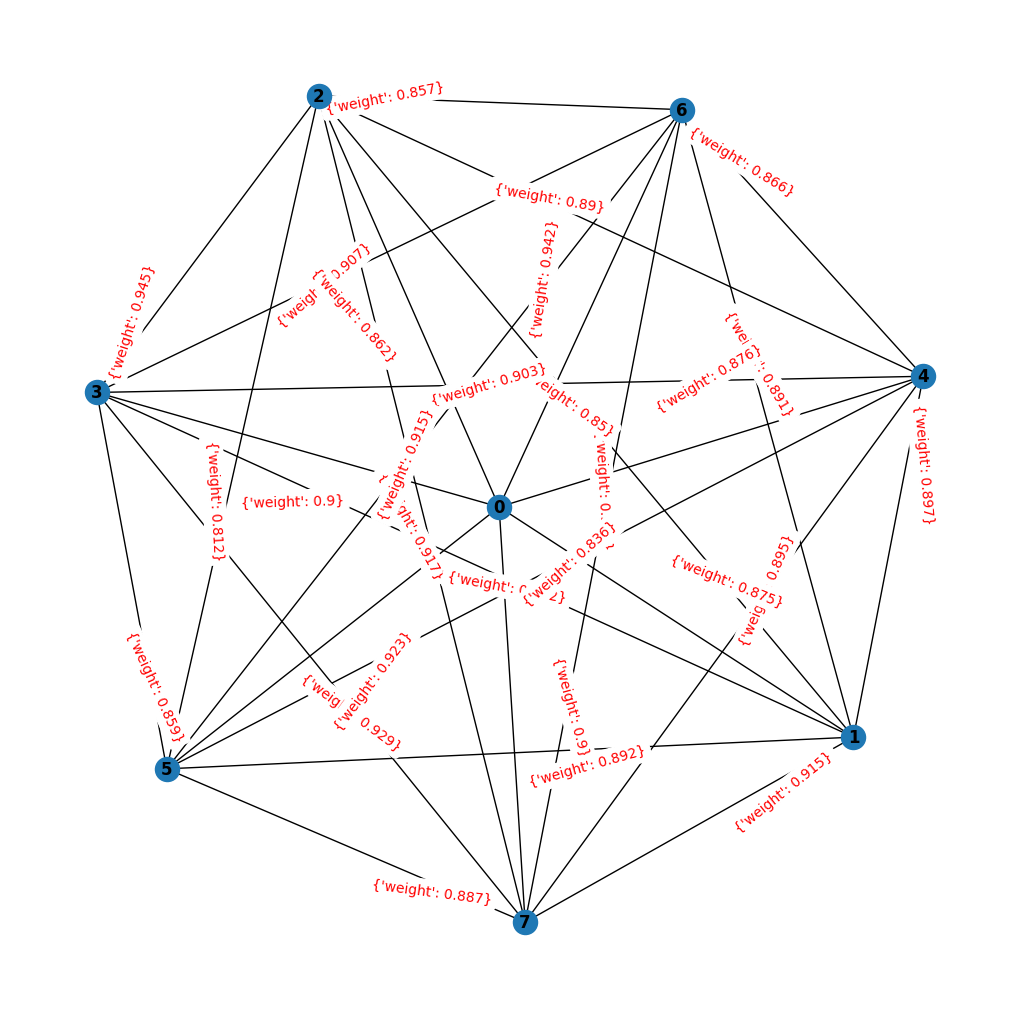

In [11]:
sim_mat = np.zeros([len(cleaned_texts), len(cleaned_texts)])
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,dim),sentence_vectors[j].reshape(1,dim))[0,0]
sim_mat = np.round(sim_mat,3)
print(sim_mat)

# Creating the network graph
nx_graph = nx.from_numpy_array(sim_mat)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
plt.show()

In [12]:
scores = nx.pagerank(nx_graph)
print(scores)

{0: 0.12692096521840623, 1: 0.12462718469324317, 2: 0.12377567389009675, 3: 0.1257903722164584, 4: 0.1257738276706064, 5: 0.12309625866581504, 6: 0.1267644467179036, 7: 0.1232512709274703}


In [15]:
ranked_sentences = sorted(((scores[i],i) for i, s in enumerate(sentences)), reverse=True)
arranged_sentences = sorted(ranked_sentences[0:int(len(sentences)*0.5)], key=lambda x:x[1])
print("\n".join([sentences[x[1]] for x in arranged_sentences]))


In March 2022, the Government of Canada introduced Canada’s 2030 Emissions Reduction Plan, which provides a roadmap for the Canadian economy to achieve 40-45% emissions reductions below 2005 levels by 2030, building upon the actions outlined in Canada’s previous climate plans.
Also as part of the plan, the Government of Canada committed to develop Canada’s first National Adaptation Strategy by working with provincial, territorial and municipal governments, Indigenous Peoples, and other key partners.
The National Adaptation Strategy will build upon the Pan-Canadian Framework and adaptation strategies led by provinces, territories, local governments, Indigenous Peoples and others, to unite actors across Canada through shared priorities, cohesive action, and a whole-of-Canada approach to reducing climate change risks.
It is an important first step for Canada to achieve its Paris Agreement target, and is doing more to cut pollution in a practical and affordable way than any other climate p